In [4]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from parsing import parser, digit
from plotting import plotter, voronoi
from analysis import training

In [6]:
parse = parser.Parser();
train_digits = parse.parse_file('data/pendigits-train');
test_digits = parse.parse_file('data/pendigits-test')

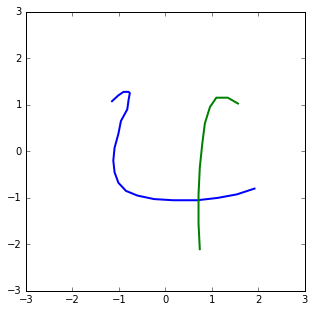

In [18]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(train_digits[6], True)

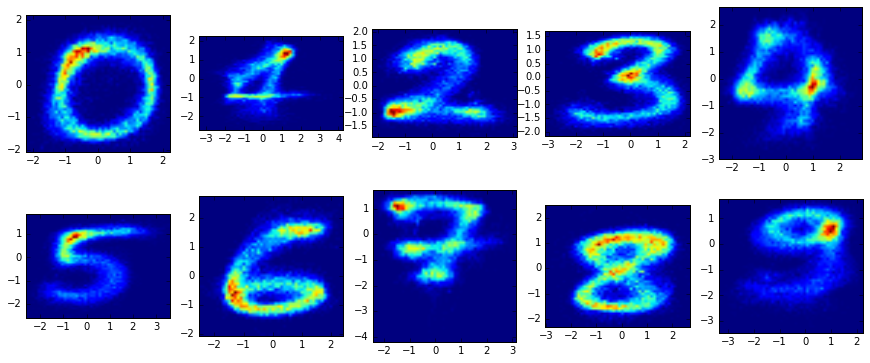

In [8]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digits_heatmap(train_digits, True);

In [24]:
centroids = training.get_digit_kmeans_centroids(train_digits, 254)

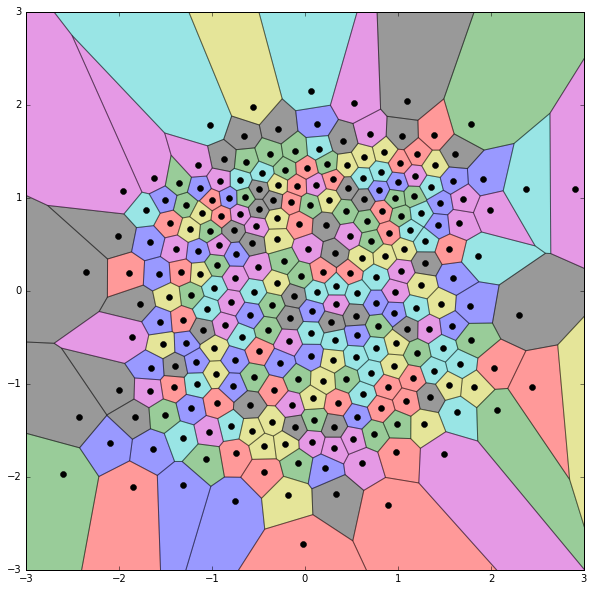

In [25]:
pylab.rcParams['figure.figsize'] = (10, 10);
voronoi.plot_centroids(centroids);

In [30]:
training.set_digit_observations(train_digits, centroids)

In [32]:
print(train_digits[6].np_array_observations)

[254  98  25  25  17  17   7   7 127  78  26 220 118  40 159 162 142 222
  87  72 152  86 255 254  28  38  42 148 212  80  85 136  50 198 255]
